# Introduction
This notebook is `Chexmix` tutorial.  
The key concept of Chexmix is getting various information from `Keyword`.  
  
[Chexmix paper]('https://www.nature.com/articles/s41598-022-12093-9')
## Contents
- how to build graphs
- how to combine graphs
- how to build Chexmix graph


In [1]:
import json
import pickle
import networkx as nx
import chexmix.graph as graph
from chexmix.utils import remove_symbols

In [2]:
## KPEB data load
with open('../data/KPEB/KPEB_name_taxID.json', 'r') as f:
    kpeb_data = json.load(f)
kpeb_data = {int(k): v for k,v in kpeb_data.items()}

##viridiplantae load
with open('../data/viridiplanae.txt', 'rb') as f:
    viridiplantae = pickle.load(f)

In [3]:
# graph save directory path
path = '../data/network/'

In [4]:
# Set division point hierarchical Taxonomy (Genus or Family)
parent_node_type = graph.TaxParentType.Genus

In [5]:
def draw_graph(g):
    nx.draw(g, with_labels=True, connectionstyle="arc3,rad=-0.3")

# How to build graphs
- this section will build basic graphs using Keyword

In [19]:
# pubmed graph using keyword
keyword = 'cynandione A' # put keyword

pubmed_graph = graph.PubMedGraph.from_keyword(keyword)
article_ids = pubmed_graph.get_article_ids()

  0%|          | 0/1 [00:00<?, ?it/s]

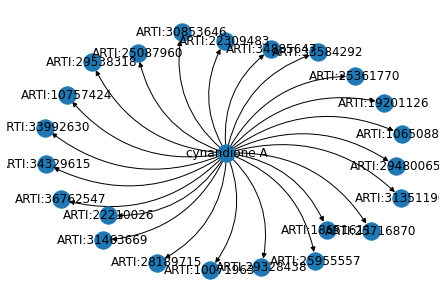

In [24]:
draw_graph(pubmed_graph)

In [20]:
# pubtator graph 
pubtator_graph = graph.PubTatorGraph.from_article_ids(article_ids)

  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# taxonomy graph
tax_bioentities = pubtator_graph.get_bioentities('TAXO')
tax_graph = graph.TaxonomyGraph.from_pubtator_bioentities(parent_node_type, tax_bioentities, viridiplantae, 'KPEB', kpeb_data)

In [22]:
# mesh graph
mesh_bioentities = pubtator_graph.get_bioentities('MESH')
mesh_graph = graph.MeSHGraph.from_pubtator_bioentities(mesh_bioentities, ['D','C'])

In [23]:
# if you want to see nodes and edges data, run below codes
# graph.nodes(data=True)
# graph.edges(data=True)
list(tax_graph.nodes(data=True))[0]

('TAXO:126747',
 {'type': 'Taxonomy',
  'id': 126747,
  'name': 'Cynanchum',
  'parent_id': 1498478,
  'family': 'Apocynaceae',
  'genus': '',
  'sub_type': 'Genus'})

# How to combine graphs
- using function
    - `graph.union(other_graph)`
    - `graph.intersection(other_graph)`

In [38]:
union_graph = pubtator_graph.union(tax_graph)
# intersect() only represent intersect nodes
intersect_graph = pubtator_graph.intersection(mesh_graph)

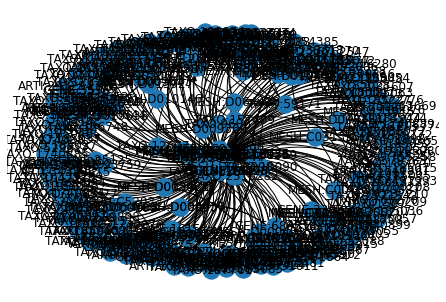

In [36]:
draw_graph(pubtator_graph.union(tax_graph))

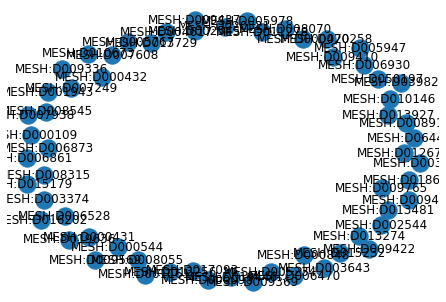

In [37]:
draw_graph(intersect_graph)

# How to build Chexmix graph

In [ ]:
input_names = ["cynandione A", "cynanchum wilfordii"]
chexmix_graphs = []

In [101]:
for input_name in input_names:    
    file_name = path + remove_symbols(input_name)
    # phase 1. build graphs
    pubmed_graph = graph.PubMedGraph.from_keyword(input_name)
    article_ids = pubmed_graph.get_article_ids()
    
    pubtator_graph = graph.PubTatorGraph.from_article_ids(article_ids)
    
    tax_graph = graph.TaxonomyGraph.from_pubtator_bioentities(parent_node_type, pubtator_graph.get_bioentities('TAXO'),
                                                              viridiplantae, 'KPEB', kpeb_data)
    
    mesh_graph = graph.MeSHGraph.from_pubtator_bioentities(pubtator_graph.get_bioentities('MESH'), ['D','C'])
    
    # phase 2. combine graphs
    chexmix_graph = pubmed_graph.union(pubtator_graph.union(tax_graph).union(mesh_graph))
    # export graph
    nx.write_graphml(chexmix_graph.to_graphml(), f'{file_name}_chexmix.graphml')
    chexmix_graphs.append(chexmix_graph)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [107]:
intersection_graph=chexmix_graphs[0].intersection(chexmix_graphs[1])
union_graph = chexmix_graphs[0].union(chexmix_graphs[1])

In [108]:
# nx.write_graphml(intersection_graph.to_graphml(), '../data/network/cynandione_test_intersection.graphml')
# nx.write_graphml(union_graph.to_graphml(), '../data/network/cynandione_test_union.graphml')